In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('C:\\Users\\DELL\\Git\\Lab_EDA_Gestion_Nulos\\datos\\df_resultados_sin_out.csv', index_col=0)
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV_robust,model,kilometer_robust,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,year_created,month_created
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480,test,Desconocido,Modernos,manually,0.075206,golf,0.0,Desconocido,petrol,volkswagen,Desconocido,2016-04-07 03:16:57,2016,3
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,Actuales,manually,1.063492,Desconocido,-1.0,5,diesel,audi,yes,2016-04-07 01:46:50,2016,3
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,test,suv,Modernos,automatic,0.650794,grand,-1.0,8,diesel,jeep,Desconocido,2016-04-05 12:47:46,2016,3
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500,test,small car,Modernos,manually,-0.730159,golf,0.0,6,petrol,volkswagen,no,2016-03-17 17:40:17,2016,3
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,small car,Modernos,manually,-0.825397,fabia,-2.4,7,diesel,skoda,no,2016-04-06 10:17:21,2016,3


<Axes: xlabel='powerCV_robust', ylabel='price'>

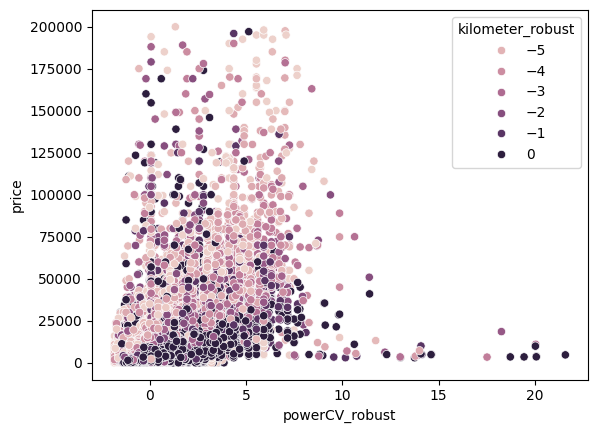

In [8]:
sns.scatterplot(y = 'price', x = 'powerCV_robust', hue='kilometer_robust' ,data = df)

In [9]:
df[(df['powerCV_robust'] > 15) & (df['price'] < 30000)]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV_robust,model,kilometer_robust,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,year_created,month_created
19912,2016-03-18 23:52:30,Nissan_Micra___treues_Rentnerauto_&_Schmuckstueck,private,offer,3390,test,Desconocido,Modernos,manually,17.507937,micra,-3.6,3,petrol,nissan,no,2016-03-31 11:16:49,2016,3
78553,2016-03-05 14:18:05,Bmw_320_diesel,private,offer,4700,test,combi,Modernos,automatic,21.571429,3er,0.0,12,diesel,bmw,no,2016-04-07 14:57:46,2016,3
84762,2016-03-06 15:48:33,Mercedes_Benz_C_180_CDI_DPF_Alu_Klima__BlueEFF...,private,offer,18550,test,Desconocido,Actuales,manually,18.253968,c_klasse,-2.4,11,diesel,mercedes_benz,no,2016-04-06 20:45:45,2016,3
113424,2016-03-09 11:38:38,Wolkswagen_Passat_2.0,private,offer,3799,test,combi,Modernos,manually,20.063492,passat,0.0,9,diesel,volkswagen,no,2016-03-10 06:16:16,2016,3
140982,2016-03-13 16:52:15,Passat_2_0_Highline_Austattung__Zahnriemen_neu...,private,offer,3550,test,combi,Modernos,manually,20.063492,passat,0.0,10,diesel,volkswagen,yes,2016-03-24 06:45:55,2016,3
193086,2016-03-09 19:54:12,Verkaufe_mein_VW_Passat_3bg,private,offer,3500,test,combi,Modernos,manually,18.714286,Desconocido,0.0,3,diesel,volkswagen,no,2016-03-09 19:54:12,2016,3
222201,2016-03-20 17:40:16,Opel_Astra_J_Sports_Tourer_1_4Turbo_60700Km_Na...,private,offer,11000,test,combi,Modernos,manually,20.031746,Desconocido,-3.2,11,petrol,opel,Desconocido,2016-04-01 02:47:29,2016,3
274838,2016-03-14 11:37:23,Peugeot_307_cc,private,offer,3500,test,convertible,Modernos,manually,19.428571,3_reihe,0.0,4,diesel,peugeot,Desconocido,2016-03-14 11:37:23,2016,3
312526,2016-03-24 11:51:57,VW_TOURAN_HIGHLINE_2.0_TDI_DIESEL,private,offer,9900,test,bus,Actuales,manually,20.015873,touran,0.0,1,Desconocido,volkswagen,no,2016-04-01 06:18:26,2016,3


Sustituir su power por la media, porque estos coches no es posible que tenga un caballaje de ese valor

Otra prueba

In [17]:
df[(df['powerCV_robust'] > 7) & (df['powerCV_robust'] < 15) & (df['price'] < 12500)]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV_robust,model,kilometer_robust,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,year_created,month_created
4075,2016-04-03 20:31:00,Mitsubishi_Colt_Diesel_1_5,private,offer,3100,control,Desconocido,Modernos,manually,13.015873,colt,0.0,4,diesel,mitsubishi,no,2016-04-07 14:56:46,2016,4
6527,2016-03-14 15:54:34,Fiat_Grande_Punto_Letzter_Tag_!,private,offer,3000,control,small car,Modernos,manually,10.158730,punto,-1.0,Desconocido,petrol,fiat,Desconocido,2016-03-14 15:54:34,2016,3
12798,2016-03-09 18:43:44,Ford_Streetka_1.6_8V,private,offer,3500,test,convertible,Modernos,manually,13.000000,ka,-3.2,5,petrol,ford,no,2016-03-12 04:16:07,2016,3
21180,2016-03-16 16:46:57,Opel_Corsa_D_1_2_Cosmo_Teilleder_Klima,private,offer,3990,control,Desconocido,Actuales,manually,10.746032,corsa,-1.0,10,Desconocido,opel,no,2016-03-19 14:18:02,2016,3
25289,2016-04-04 20:58:13,SKODA_FABIA_1_2_HTP_EASY/2.HAND/SCHECKH./TÜV_B...,private,offer,4300,control,Desconocido,Actuales,manually,8.984127,fabia,0.0,2,petrol,skoda,no,2016-04-06 23:44:26,2016,4
55054,2016-03-10 08:55:49,Opel_Corsa,private,offer,5500,test,small car,Modernos,Desconocido,10.698413,corsa,-4.4,Desconocido,petrol,opel,Desconocido,2016-04-06 07:16:05,2016,3
57181,2016-03-08 18:50:43,Seat_Leon_1.6,private,offer,4900,test,Desconocido,Modernos,manually,14.126984,leon,-1.0,5,petrol,seat,no,2016-03-11 15:16:59,2016,3
85227,2016-03-05 14:49:03,Opel_Astra_1.6_Caravan,private,offer,5000,control,combi,Modernos,manually,14.619048,astra,-1.0,8,petrol,opel,no,2016-03-17 21:16:38,2016,3
115225,2016-03-08 23:54:10,Mercedes_S63_AMG_4Matic___Langzeitmiete_!!!,private,offer,4538,control,coupe,Actuales,automatic,7.253968,s_klasse,-5.8,Desconocido,petrol,mercedes_benz,Desconocido,2016-03-09 07:41:25,2016,3
120443,2016-03-20 17:36:57,MINI_HOT_ROD__OLDTIMER__US_CAR__ROCKABILLY,private,offer,3000,test,small car,Actuales,manually,13.746032,andere,0.0,Desconocido,petrol,ford,yes,2016-04-06 23:46:35,2016,3


ponerles la media de power_CV

In [20]:
df[(df['kilometer_robust'] > -1) & (df['price'] > 150000)]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV_robust,model,kilometer_robust,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,year_created,month_created
35056,2016-03-07 20:44:27,2005_SEAT_Altea_1.9TDI_Reference,private,offer,154651,test,Desconocido,Modernos,Desconocido,0.075206,altea,0.0,Desconocido,Desconocido,seat,Desconocido,2016-03-08 01:45:57,2016,3
85023,2016-04-03 14:49:42,"Porsche_930_Cabriolet_""matching_numbers""_Dt._Fzg",private,offer,174000,test,convertible,Modernos,manually,2.793651,911,0.0,9,petrol,porsche,no,2016-04-05 13:47:40,2016,4
97748,2016-03-30 13:51:16,Toyota_Corolla_1.6_G6_S_by_TTE,private,offer,160000,test,Desconocido,Modernos,manually,-0.190476,corolla,0.0,2,petrol,toyota,no,2016-03-30 13:51:16,2016,3
206232,2016-03-08 12:58:04,Mercedes_Benz_Flachkuehler_280_SE_Cabrio_W111_...,private,offer,169000,test,convertible,Retro,automatic,0.603175,andere,0.0,3,petrol,mercedes_benz,no,2016-04-05 16:44:43,2016,3
215691,2016-03-16 18:47:26,Porsche_993/911_Turbo_WLS_II_Exclusive_S_deuts...,private,offer,197000,control,coupe,Modernos,manually,5.142857,911,0.0,3,Desconocido,porsche,no,2016-04-07 02:44:47,2016,3


# Pruebas

In [10]:
x= df.drop(columns='price')
y = df[['price']]

In [11]:
y.describe()

,price
count,356209.000000
mean,5919.659879
std,8292.917940
min,1.000000
25%,1299.000000
50%,3150.000000
75%,7500.000000
max,199900.000000


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=42)

In [13]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(x_train, y_train) # aprendizaje

ValueError: could not convert string to float: '2016-03-20 23:46:08'

In [ ]:
y_train_pred = modelo_lineal.predict(x_train)
y_train_pred[:3]

array([[ 6831.29107478],
       [ 5048.56552901],
       [-3023.00209017]])

In [ ]:
y_test_pred = modelo_lineal.predict(x_test) # predicciones, con xtest porque xtest son sus parametros. ytest son las respuestas con las que comparemos
y_test_pred[:3]

array([[ 8636.08536665],
       [ 9836.35831872],
       [-4245.22391003]])

In [ ]:
metricas = {
'train': {
    'r2_score': r2_score(y_train, y_train_pred),
    'MAE': mean_absolute_error(y_train, y_train_pred),
    'MSE': mean_squared_error(y_train, y_train_pred),
    'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
},
'test': {
    'r2_score': r2_score(y_test, y_test_pred),
    'MAE': mean_absolute_error(y_test, y_test_pred),
    'MSE': mean_squared_error(y_test, y_test_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

}
}

pd.DataFrame(metricas).T

,r2_score,MAE,MSE,RMSE
train,0.572965,3126.430963,2.944630e+07,5426.444819
test,0.579021,3110.402595,2.877201e+07,5363.954923
